In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt

In [33]:
def mse(y_pred, y):
  return np.mean((y_pred - y) ** 2)

In [23]:
def transform(x, degree):
  columns = x.columns

  for col in columns:
    for i in range(2, degree + 1):
      x[col+" to the power " + str(i)] = x[col] ** i
  return x

In [37]:
def pred(x, w, b):
  return np.dot(x, w) + b

In [16]:
def normalize(x):
  columns = x.columns
  for col in columns:
    x[col] = (x[col] - x[col].mean()) / x[col].std()
  return x


In [9]:
def train_test_split(x, y, test_size=0.2):
  n = x.shape[0]
  train_size = int((1 - test_size) * n)
  x_train = x.values[:train_size]
  y_train = y.values[:train_size]
  x_test = x.values[train_size:]
  y_test = y.values[train_size:]
  return x_train, y_train, x_test, y_test

In [35]:
def gradient_descent(x, y, w, b, alpha, epochs=1000):
  m = x.shape[0]
  n = x.shape[1]

  if w.shape[0] != n:
    return ValueError("number of features n should be equal to number of weights w")

  x_cost = []
  num_epochs = []

  for epoch in range(epochs):
    y_pred = np.dot(x, w) + b
    error = y_pred - y
    w_grad = (1/m) * np.dot(x.T, error)
    b_grad = (1/m) * np.sum(error)

    w -= alpha * w_grad
    b -= alpha * b_grad

    cost = mse(y_pred, y)
    x_cost.append(cost)
    num_epochs.append(epoch + 1)

  plt.figure(figsize=(10, 5))
  plt.plot(num_epochs, x_cost)
  plt.grid()
  plt.xlabel("Number of Epochs")
  plt.ylabel("Cost")
  plt.title("Cost vs Number of Epochs")
  plt.show()

  return w, b


In [24]:
df = fetch_california_housing(as_frame=True)
x = df.data
y = df.target
x = transform(x, 2)
x = x.sample(frac=1).reset_index(drop=True)
y = y.sample(frac=1).reset_index(drop=True)

In [38]:
x = normalize(x)
x_train, y_train, x_test, y_test = train_test_split(x, y)

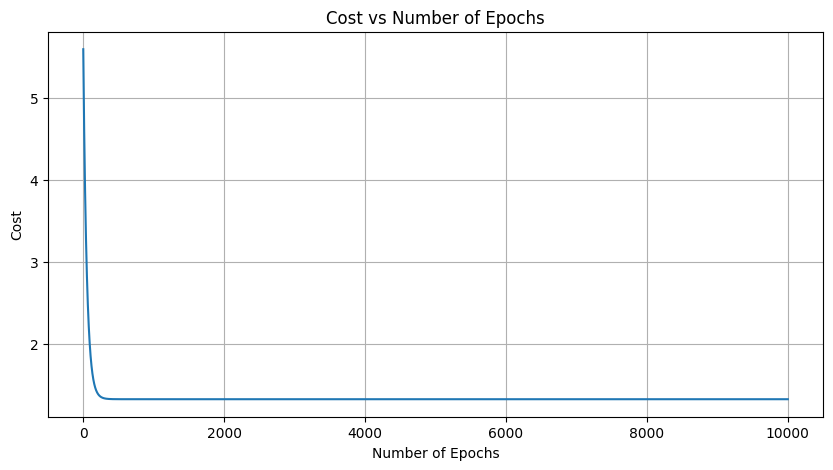

In [39]:
w = np.zeros(x.shape[1])
b = 0
alpha = 0.01
epochs = 10_000
w, b = gradient_descent(x_train, y_train, w, b, alpha, epochs)

In [40]:
print(mse(pred(x_train, w, b), y_train))
print(mse(pred(x_test, w, b), y_test))

1.3281632567428079
1.3421851686638866
